# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

In [ ]:
import glob

In [ ]:
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import cv2

In [ ]:
import tqdm

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
!pip install nbresult

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [ ]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  17.4M      0  0:00:05  0:00:05 --:--:-- 19.5M
total 64
drwx------ 2 root root 53248 Jun  9 13:06 paintings
drwxr-xr-x 1 root root  4096 Jun 15 13:37 sample_data
drwxr-xr-x 3 root root  4096 Jun 30 11:37 tests


In [ ]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Alfred_Sisley_22.jpg',
 './paintings/Leonardo_da_Vinci_108.jpg',
 './paintings/Rembrandt_145.jpg',
 './paintings/Pierre-Auguste_Renoir_173.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Claude_Monet_62.jpg',
 './paintings/Rembrandt_52.jpg',
 './paintings/Vincent_van_Gogh_651.jpg',
 './paintings/Francisco_Goya_234.jpg',
 './paintings/Pierre-Auguste_Renoir_274.jpg',
 './paintings/Alfred_Sisley_31.jpg',
 './paintings/Paul_Gauguin_137.jpg',
 './paintings/Albrecht_DuÌ\x88rer_208.jpg',
 './paintings/Joan_Miro_62.jpg',
 './paintings/Henri_Rousseau_8.jpg',
 './paintings/Paul_Klee_69.jpg',
 './paintings/Edouard_Manet_24.jpg',
 './paintings/Rene_Magritte_147.jpg',
 './paintings/Albrecht_DuÌ\x88rer_56.jpg',
 './paintings/Titian_146.jpg',
 './paintings/Albrecht_DuÌ\x88rer_288.jpg',
 './paintings/Francisco_Goya_278.jpg',
 './paintings/Vincent_van_Gogh_608.jpg',
 './paintings/Rene_Magritte_132.jpg',
 './paintings/Peter_Paul_Rubens_57.jpg',
 './paintings/Amedeo_Modigliani_1

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

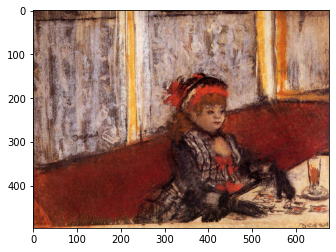

In [ ]:
# YOUR CODE HERE
img_53 = Image.open(dataset_paths[53])
plt.imshow(img_53)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [ ]:
# YOUR CODE HERE
img_shape = (np.array(img_53).shape[0],np.array(img_53).shape[1])
print(img_shape)
img_dim = np.array(img_53).shape[2]
print(img_dim)

(497, 676)
3


❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

❓ **What was in the image above?**

In [ ]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

#is_portrait = True
is_portrait = False

is_colored_image = True
#is_colored_image = False

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [ ]:
# YOUR CODE HERE
dataset_images = []
for im in dataset_paths :
  load = Image.open(im)
  dataset_images.append(np.array(load))

In [ ]:
len(dataset_images)

1085

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [ ]:
len(dataset_images)

1085

In [ ]:
# YOUR CODE HERE
dataset_shape = []
for im in dataset_images:
  dataset_shape.append(np.array(im).shape)

In [ ]:
dataset_shape
# On remarque que les images n'ont pas tous la même taille, et certaines ne sont pas en 3D, probablement les images en noir et blanc

[(496, 614, 3),
 (903, 614, 3),
 (614, 391, 3),
 (614, 511, 3),
 (960, 682, 3),
 (651, 1199, 3),
 (614, 503, 3),
 (592, 450, 3),
 (785, 450, 3),
 (614, 430, 3),
 (811, 1193, 3),
 (491, 614, 3),
 (1229, 887, 3),
 (348, 433, 3),
 (355, 450, 3),
 (388, 480, 3),
 (673, 423, 3),
 (341, 484, 3),
 (1229, 642),
 (886, 477, 3),
 (1069, 1536),
 (600, 344, 3),
 (614, 764, 3),
 (367, 484, 3),
 (615, 427, 3),
 (484, 301, 3),
 (480, 480, 3),
 (284, 362, 3),
 (659, 552, 3),
 (646, 470, 3),
 (480, 301, 3),
 (461, 365, 3),
 (600, 437, 3),
 (288, 252, 3),
 (360, 459, 3),
 (842, 1229),
 (614, 475, 3),
 (688, 537, 3),
 (600, 535, 3),
 (609, 768, 3),
 (614, 447, 3),
 (1229, 951),
 (834, 719, 3),
 (614, 410, 3),
 (491, 671, 3),
 (340, 480, 3),
 (614, 470, 3),
 (426, 316, 3),
 (614, 491, 3),
 (463, 1536, 3),
 (503, 614, 3),
 (499, 614, 3),
 (283, 339, 3),
 (497, 676, 3),
 (614, 757, 3),
 (484, 398, 3),
 (328, 614, 3),
 (614, 436, 3),
 (543, 480, 3),
 (638, 412, 3),
 (461, 322, 3),
 (586, 790, 3),
 (588, 570,

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [ ]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in dataset_images]
set([x.ndim for x in dataset_images])

{3}

In [ ]:
# On met à jour dataset_shape pour vérifier que tout est bon
dataset_shape = []
for im in dataset_images:
  dataset_shape.append(np.array(im).shape)

In [ ]:
# Cela semble être le cas
dataset_shape

[(496, 614, 3),
 (903, 614, 3),
 (614, 391, 3),
 (614, 511, 3),
 (960, 682, 3),
 (651, 1199, 3),
 (614, 503, 3),
 (592, 450, 3),
 (785, 450, 3),
 (614, 430, 3),
 (811, 1193, 3),
 (491, 614, 3),
 (1229, 887, 3),
 (348, 433, 3),
 (355, 450, 3),
 (388, 480, 3),
 (673, 423, 3),
 (341, 484, 3),
 (1229, 642, 3),
 (886, 477, 3),
 (1069, 1536, 3),
 (600, 344, 3),
 (614, 764, 3),
 (367, 484, 3),
 (615, 427, 3),
 (484, 301, 3),
 (480, 480, 3),
 (284, 362, 3),
 (659, 552, 3),
 (646, 470, 3),
 (480, 301, 3),
 (461, 365, 3),
 (600, 437, 3),
 (288, 252, 3),
 (360, 459, 3),
 (842, 1229, 3),
 (614, 475, 3),
 (688, 537, 3),
 (600, 535, 3),
 (609, 768, 3),
 (614, 447, 3),
 (1229, 951, 3),
 (834, 719, 3),
 (614, 410, 3),
 (491, 671, 3),
 (340, 480, 3),
 (614, 470, 3),
 (426, 316, 3),
 (614, 491, 3),
 (463, 1536, 3),
 (503, 614, 3),
 (499, 614, 3),
 (283, 339, 3),
 (497, 676, 3),
 (614, 757, 3),
 (484, 398, 3),
 (328, 614, 3),
 (614, 436, 3),
 (543, 480, 3),
 (638, 412, 3),
 (461, 322, 3),
 (586, 790, 3),

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [ ]:
 a = np.array(tf.image.resize(dataset_images[0],[120,100]))
 a.shape

(120, 100, 3)

In [ ]:
# YOUR CODE HERE
for i in range(len(dataset_images)) :
  dataset_images[i] = np.array(tf.image.resize(dataset_images[i],[120,100]))


In [ ]:
# On met à jour dataset_shape pour vérifier que tout est bon
dataset_shape = []
for im in dataset_images:
  dataset_shape.append(np.array(im).shape)

# Cela semble être le cas
dataset_shape 

[(120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 100, 3),
 (120, 1

In [ ]:
dataset_resized = np.array(dataset_images)
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [ ]:
dataset_resized = np.array(dataset_images)
dataset_scaled = dataset_resized/255

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [ ]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

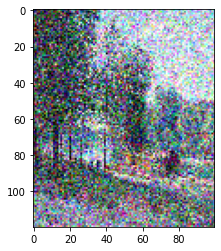

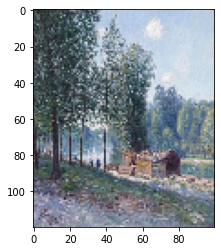

In [ ]:
# YOUR CODE HERE

plot1 = plt.figure(1)
plt.imshow(dataset_noisy[0])
plot2 = plt.figure(2)
plt.imshow(dataset_scaled[0])
plt.show;

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [ ]:
# YOUR CODE HERE
X = dataset_noisy
Y = dataset_scaled



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [ ]:
X_test.shape

(217, 120, 100, 3)

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [ ]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [ ]:
# On recupère la taille de l'image pour l'encoder
new_img_shape = X_train[0].shape
new_img_shape

(120, 100, 3)

In [ ]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = Sequential(name='encoder')

    
encoder.add(layers.Conv2D(8, (2,2), input_shape=new_img_shape, activation='relu'))
encoder.add(layers.MaxPooling2D(2))

encoder.add(layers.Conv2D(16, (2, 2), activation='relu'))
encoder.add(layers.MaxPooling2D(2))

encoder.add(layers.Conv2D(32, (2, 2), activation='relu'))
encoder.add(layers.MaxPooling2D(2))     

encoder.add(layers.Flatten())
encoder.add(layers.Dense(latent_dimensions, activation='tanh'))

encoder.summary()



Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 119, 99, 8)        104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 48, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 23, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0   

👉 **Test your encoder below**

In [ ]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              29576712  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 29,583,387
Trainable params: 29,583,387
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [ ]:
# YOUR CODE HERE
score_baseline = mean_absolute_error(Y_test.flatten(),X_test.flatten())
score_baseline

0.14079823

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# On compile l'autoencoder
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(loss='mae',optimizer=opt)

In [ ]:
es = EarlyStopping(patience = 5,restore_best_weights=True)

history = autoencoder.fit(X_train, Y_train, epochs=20, 
                          validation_split = 0.2,
                          batch_size=32,
                          callbacks=[es])

Epoch 1/20
22/22 [==============================] - 30s 1s/step - loss: 0.2373 - val_loss: 0.2267
Epoch 2/20
22/22 [==============================] - 28s 1s/step - loss: 0.2148 - val_loss: 0.1814
Epoch 3/20
22/22 [==============================] - 28s 1s/step - loss: 0.1742 - val_loss: 0.1480
Epoch 4/20
22/22 [==============================] - 28s 1s/step - loss: 0.1472 - val_loss: 0.1377
Epoch 5/20
22/22 [==============================] - 28s 1s/step - loss: 0.1320 - val_loss: 0.1247
Epoch 6/20
22/22 [==============================] - 28s 1s/step - loss: 0.1219 - val_loss: 0.1199
Epoch 7/20
22/22 [==============================] - 28s 1s/step - loss: 0.1158 - val_loss: 0.1194
Epoch 8/20
22/22 [==============================] - 28s 1s/step - loss: 0.1141 - val_loss: 0.1186
Epoch 9/20
22/22 [==============================] - 28s 1s/step - loss: 0.1117 - val_loss: 0.1175
Epoch 10/20
22/22 [==============================] - 28s 1s/step - loss: 0.1071 - val_loss: 0.1162
Epoch 11/20
22/22 [

❓ **Plot your training and validation loss at each epoch using the cell below**

In [ ]:
history.history

{'loss': [0.2372797280550003,
  0.21480689942836761,
  0.17417460680007935,
  0.14717231690883636,
  0.13196784257888794,
  0.12186512351036072,
  0.11576896905899048,
  0.11412286013364792,
  0.11165515333414078,
  0.10712006688117981,
  0.10597587376832962,
  0.1045672595500946,
  0.10200442373752594,
  0.10473903268575668,
  0.10163585841655731],
 'val_loss': [0.226658895611763,
  0.1814170777797699,
  0.14803092181682587,
  0.13772866129875183,
  0.12471462041139603,
  0.11989147216081619,
  0.1193586140871048,
  0.11864235997200012,
  0.11752758920192719,
  0.11620298773050308,
  0.11888254433870316,
  0.12081994861364365,
  0.11691507697105408,
  0.1199006736278534,
  0.11711861938238144]}

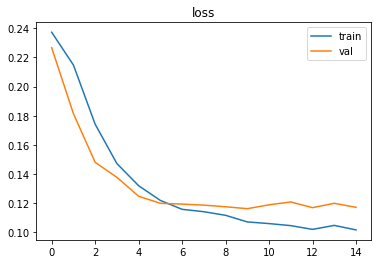

In [ ]:
plt.plot(history.history['loss'], label='train' )
plt.plot(history.history['val_loss'], label='val' )
plt.title('loss')
plt.legend();

# On remarque que l'autoencoder commence à overfiter vers 5 epoch

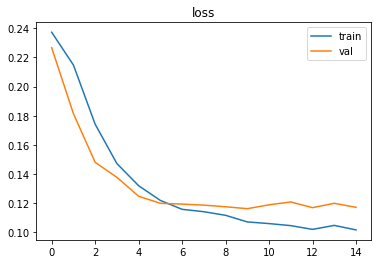

In [ ]:
# Plot below your train/val loss history
# YOUR CODE HERE

plt.plot(history.history['loss'], label='train' )
plt.plot(history.history['val_loss'], label='val' )
plt.title('loss')
plt.legend();

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [ ]:
Y_pred = autoencoder.predict(X_test)

In [ ]:
# YOUR CODE HERE
score_test = autoencoder.evaluate(X_test,Y_test)
# Notre modèle est un peu plus performant qu'une baseline

7/7 [==============================] - 2s 346ms/step - loss: 0.1230


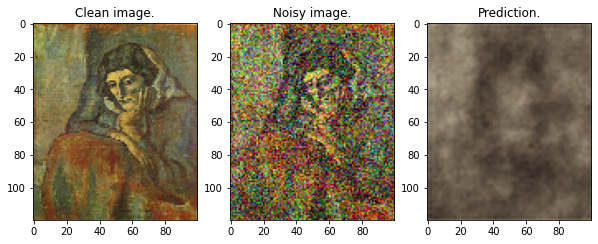

In [ ]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()